<a href="https://colab.research.google.com/github/jasonhckim/Amazon_seller_order_status/blob/main/Amazon_Seller_Order_Status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("/content/orders_data.xlsx")
df

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer
...,...,...,...,...,...,...,...,...,...,...,...,...
166,171-2829978-1258758,"Mon, 13 Dec, 2021, 11:30 am IST",Shahin,"MUMBAI,",MAHARASHTRA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,3,"₹1,347.00",₹84.96,Cash On Delivery,Delivered to buyer
167,402-3045457-5360311,"Wed, 1 Dec, 2021, 12:18 pm IST",Sharmistha,"DEHRADUN,",UTTARAKHAND,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹1,299.00",₹114.46,NaN,Delivered to buyer
168,408-2260162-8323567,"Thu, 9 Dec, 2021, 6:55 pm IST",shashank,"Durg,",CHHATTISGARH,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹1,299.00",₹105.02,NaN,Delivered to buyer
169,403-5664951-8941100,"Wed, 23 Feb, 2022, 12:43 am IST",Jayeta,"KOLKATA,",WEST BENGAL,SKU: N8-YFZF-P74I,Stylish and Sleek Multiple Pockets 100 Percent...,1,"₹1,499.00",₹80.24,Cash On Delivery,Delivered to buyer


In [6]:
df.describe()

,quantity
count,171.000000
mean,1.087719
std,0.445132
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_no      171 non-null    object
 1   order_date    171 non-null    object
 2   buyer         171 non-null    object
 3   ship_city     171 non-null    object
 4   ship_state    171 non-null    object
 5   sku           171 non-null    object
 6   description   171 non-null    object
 7   quantity      171 non-null    int64 
 8   item_total    153 non-null    object
 9   shipping_fee  145 non-null    object
 10  cod           47 non-null     object
 11  order_status  171 non-null    object
dtypes: int64(1), object(11)
memory usage: 16.2+ KB


In [8]:
#extract unique identifier for every product

In [9]:
def unique(prod):
  return prod[4:]
df['sku'] = df['sku'].apply(unique)
df

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer
...,...,...,...,...,...,...,...,...,...,...,...,...
166,171-2829978-1258758,"Mon, 13 Dec, 2021, 11:30 am IST",Shahin,"MUMBAI,",MAHARASHTRA,DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,3,"₹1,347.00",₹84.96,Cash On Delivery,Delivered to buyer
167,402-3045457-5360311,"Wed, 1 Dec, 2021, 12:18 pm IST",Sharmistha,"DEHRADUN,",UTTARAKHAND,SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹1,299.00",₹114.46,NaN,Delivered to buyer
168,408-2260162-8323567,"Thu, 9 Dec, 2021, 6:55 pm IST",shashank,"Durg,",CHHATTISGARH,SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹1,299.00",₹105.02,NaN,Delivered to buyer
169,403-5664951-8941100,"Wed, 23 Feb, 2022, 12:43 am IST",Jayeta,"KOLKATA,",WEST BENGAL,N8-YFZF-P74I,Stylish and Sleek Multiple Pockets 100 Percent...,1,"₹1,499.00",₹80.24,Cash On Delivery,Delivered to buyer


In [11]:
#remove COD column
df = df.drop(columns=['cod'])

In [12]:
#convert 'item_total' numerical
def to_float(x):
  if type(x)!=float:
    return float(x.replace(',','').replace('₹',''))

df['item_total'] = df['item_total'].apply(to_float)
df['item_total']

0       449.0
1       449.0
2       449.0
3         NaN
4      1099.0
        ...  
166    1347.0
167    1299.0
168    1299.0
169    1499.0
170     449.0
Name: item_total, Length: 171, dtype: float64

In [14]:
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objs as go
import plotly.express as px

In [15]:
trace = go.Histogram(x=df.item_total, xbins=dict(start=np.min(df.item_total), size=100, end=np.max(df.item_total)),
                   marker=dict(color='rgb(0, 0, 100)'))

layout = go.Layout(
    title="Histogram frequency counts of total price"
)

fig = go.Figure(data=go.Data([trace]), layout=layout)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning: plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.

  DeprecationWarning,


In [16]:
#has outliers, use median as central tendency
df.item_total = df.item_total.fillna(df.item_total.median())
df.item_total.isna().sum()

0

In [17]:
df.shipping_fee = df.shipping_fee.apply(to_float)

In [18]:
trace = go.Histogram(x=df.shipping_fee, xbins=dict(start=np.min(df.shipping_fee), size=10, end=np.max(df.shipping_fee)),
                   marker=dict(color='rgb(0, 0, 100)'))

layout = go.Layout(
    title="Histogram frequency counts of total price"
)

fig = go.Figure(data=go.Data([trace]), layout=layout)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [19]:
#use median
df.shipping_fee = df.shipping_fee.fillna(df.shipping_fee.median())

In [20]:
order_status = df.groupby('order_status').size().reset_index().rename(columns={0: 'Total'}).sort_values('Total', ascending=False).head()
fig = px.pie(order_status, values='Total', names='order_status', color_discrete_sequence=px.colors.sequential.Plasma, title='Order Status')
fig.show()

In [21]:
#whats the most common words in desccriptions of the products? And in the descriptions of the returned products specifically? And the descriptions of the delivered products specifically?

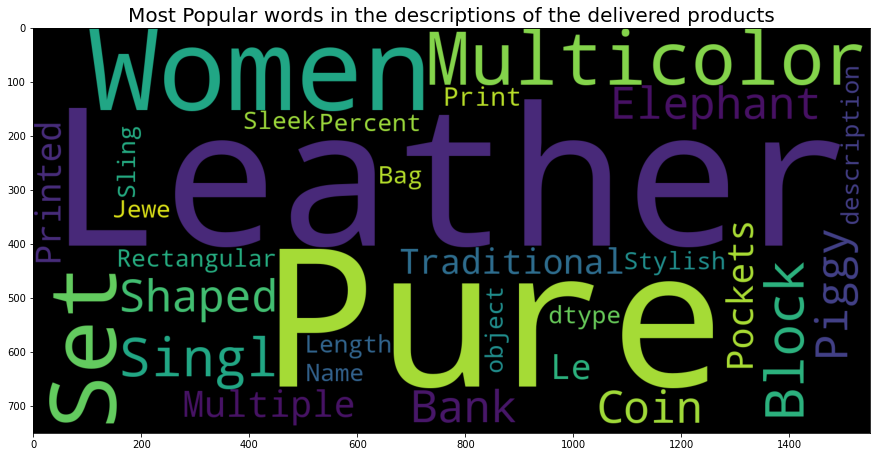

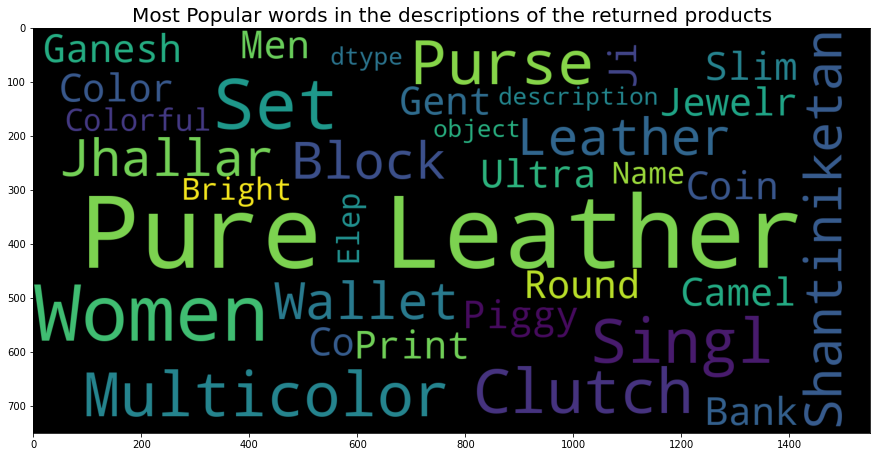

In [22]:
plt.figure(figsize=(15,10))
wc = WordCloud(max_words=1000, width=1550, height=750, stopwords=STOPWORDS).generate(str(df[df['order_status']=='Delivered to buyer'].description))
plt.title('Most Popular words in the descriptions of the delivered products', fontsize=20)
plt.imshow(wc)
plt.figure(figsize=(15,10))
wc = WordCloud(max_words=1000, width=1550, height=750, stopwords=STOPWORDS).generate(str(df[df['order_status']=='Returned to seller'].description))
plt.title('Most Popular words in the descriptions of the returned products', fontsize=20)
plt.imshow(wc)

In [23]:
#use the word leather to not get returns

In [24]:
##What are the most popular products?

In [25]:
top_prod = df.groupby('sku').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False).head(5)
fig = px.pie(top_prod, values='total', names='sku', color_discrete_sequence=px.colors.sequential.Electric, title='Top 5 products.')
fig.show()
top_prod = df.groupby('sku').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False).head(10)
fig = px.pie(top_prod, values='total', names='sku', color_discrete_sequence=px.colors.sequential.Electric, title='Top 10 products.')
fig.show()
top_prod = df.groupby('sku').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False).head(20)
fig = px.pie(top_prod, values='total', names='sku', color_discrete_sequence=px.colors.sequential.Electric, title='Top 20 products.')
fig.show()
top_prod = df.groupby('sku').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False)
top_prod = df.groupby('sku').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False)
fig = px.pie(top_prod, values='total', names='sku', color_discrete_sequence=px.colors.sequential.Electric, title='Products share')
fig.show()
top_prod = df.groupby('sku').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False)

In [26]:
##Do the descriptions of top products have something in common?

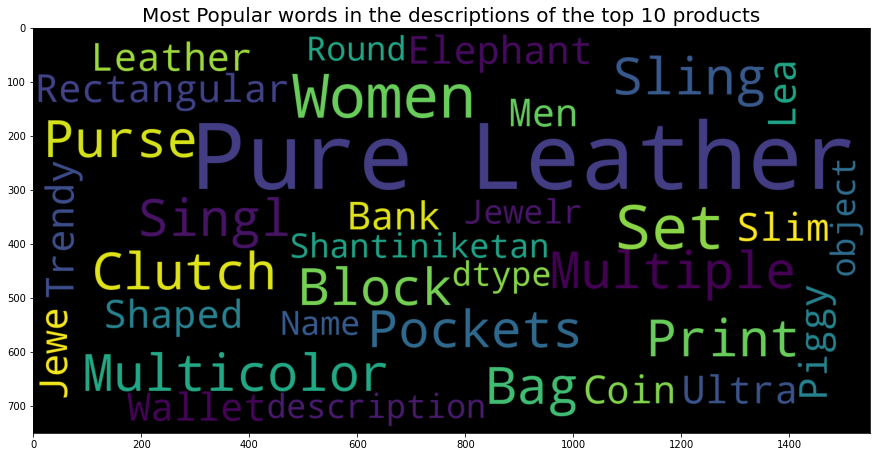

In [27]:
plt.figure(figsize=(15,10))
wc = WordCloud(max_words=1000, width=1550, height=750, stopwords=STOPWORDS).generate(str(df.head(10).description))
plt.title('Most Popular words in the descriptions of the top 10 products', fontsize=20)
plt.imshow(wc)

In [28]:
#PURE LEATHER

In [29]:
fig = px.sunburst(data_frame = df[['ship_state', 'ship_city', 'item_total']].groupby(['ship_state', 'ship_city']).sum().reset_index(), path=['ship_state', 'ship_city'], values='item_total', title='Orders by region.',color_discrete_sequence=px.colors.sequential.YlGn)
fig.show()

In [30]:
fig = px.sunburst(data_frame = df[['ship_state', 'sku', 'item_total']].groupby(['ship_state', 'sku']).sum().reset_index(), path=['ship_state', 'sku'], values='item_total', title='Product orders per region.',color_discrete_sequence=px.colors.sequential.YlOrBr)
fig.show()

In [31]:
## What is dynamics?
df['Date'] = pd.DatetimeIndex(df['order_date']).date
df_date = df[['Date', 'item_total']].groupby('Date').sum().reset_index()
df_date_2 = df[df.order_status=='Returned to seller'][['Date', 'item_total']].groupby('Date').sum().reset_index()
fig = px.line(df_date, x='Date', y="item_total", title = 'Sales over the period')
fig.add_scatter(x=df_date_2['Date'], y=df_date_2['item_total'], mode='lines')
fig.show()

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning:

tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.



In [ ]:
##no relation between the amount of products ordered this day and the amount of products bought this day that were returned
## Jan was the best month in terms of products bought
## top ordering states are Maharashtra, west Bengal and Tamil Nadu
## Top ordering cities are Mumbai, Kolkata, Bangalore, Pune and Chennai
## There is only 6% of returned orders
## The distributions of the total price and shipping fee are right-skewed and not continuous